# 红外特性-数据处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [25]:
data1=pd.read_csv("部分材料红外特性测量.csv")
I_0=5.08

for i in [0,1]:
    data1.loc[i,"反射率"]=(data1.loc[i,"反射光强"]/I_0)/(2-data1.loc[i,"反射光强"]/I_0)
    data1.loc[i,"衰减系数"]=np.array([0])

data1.loc[2,"反射率"]=data1.loc[2,"反射光强"]/I_0
data1.loc[2,"衰减系数"]=(1/data1.loc[2,"样品厚度"]) * np.log( (I_0 * (1-data1.loc[2,"反射率"])**2 ) / data1.loc[2,"透射光强"] )
data1["折射率"]=(1+np.sqrt(data1["反射率"])) / (1-np.sqrt(data1["反射率"]))
data1

C:\Users\yangt\AppData\Local\Temp\ipykernel_2104\754299209.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  data1.loc[2,"衰减系数"]=(1/data1.loc[2,"样品厚度"]) * np.log( (I_0 * (1-data1.loc[2,"反射率"])**2 ) / data1.loc[2,"透射光强"] )


,材料,样品厚度,透射光强,反射光强,反射率,折射率,衰减系数
0,1,2,4.72,0.42,0.043121,1.524157,0.0
1,1,2,3.42,0.38,0.038855,1.491021,0.0
2,1,2,0.00,0.21,0.041339,1.510415,inf


,正向偏压,发射管电流,光功率
0,0.00,0.00,0.00
1,1.30,5.03,0.52
2,1.34,10.04,1.20
3,1.35,15.04,1.89
4,1.37,20.06,2.59
5,1.39,25.00,3.27
6,1.40,30.03,3.98
7,1.42,35.01,4.67
8,1.43,40.09,5.37
9,1.44,45.02,6.07


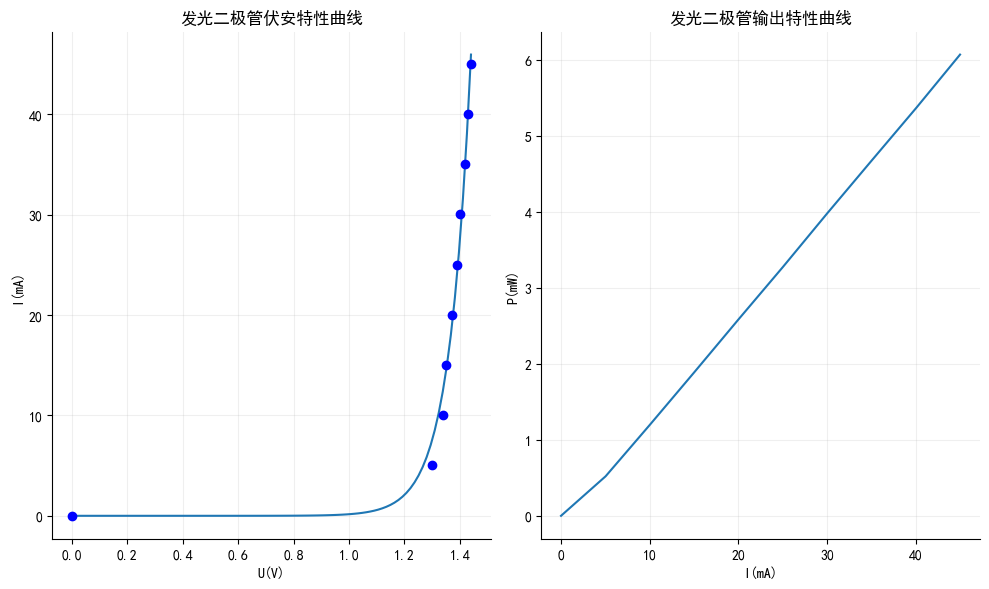

In [26]:
data2=pd.read_csv("发光二极管伏安特性输出特性.csv")
fig, axs = plt.subplots(1,2,figsize=(10, 6))

axs[0].set_title('发光二极管伏安特性曲线')
fit=np.polyfit(data2["正向偏压"],data2["发射管电流"],3)
def fit_func(x, a, b):
    return a*(np.exp(b*x)-1)

params, _ = curve_fit(fit_func, data2["正向偏压"], data2["发射管电流"])
axs[0].plot(np.linspace(0,1.44,100), fit_func(np.linspace(0,1.44,100), *params), label='Fitted curve')
axs[0].plot(data2["正向偏压"],data2["发射管电流"],'bo')
axs[0].set_xlabel('U(V)')
axs[0].set_ylabel('I(mA)')
axs[0].spines[["top", "right"]].set_visible(False)

axs[1].set_title('发光二极管输出特性曲线')
axs[1].plot(data2["发射管电流"],data2["光功率"])
axs[1].set_ylabel('P(mW)')
axs[1].set_xlabel('I(mA)')
axs[1].spines[["top", "right"]].set_visible(False)
axs[0].grid(alpha=0.2)
axs[1].grid(alpha=0.2)
plt.tight_layout()
data2

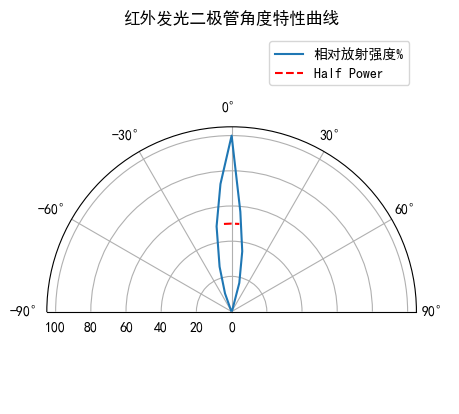

5   -5
6    0
7    5
Name: 转动角度, dtype: int64

In [31]:
data3=pd.read_csv("发光二极管角度特性.csv")
rpower=data3['光功率']*100/4.92
radians = np.deg2rad(data3['转动角度'])

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.plot(radians, rpower, label='相对放射强度%')
half_power = rpower.max() / 2
half_angle = data3[rpower >= half_power]['转动角度']
ax.plot(np.deg2rad(half_angle), [half_power]*len(half_angle), 'r--', label='Half Power')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(-90)
ax.set_thetamax(90)

ax.set_title("红外发光二极管角度特性曲线", va='bottom')
ax.legend(loc='best')

plt.show()
half_angle

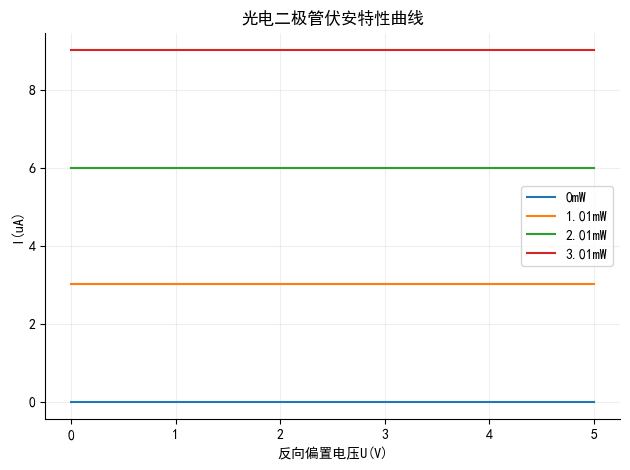

In [5]:
data4=pd.read_csv("光电二极管伏安特性曲线.csv")
fig, axs = plt.subplots()
axs.set_title('光电二极管伏安特性曲线')
axs.plot(data4["反向偏置电压"],data4["0mW"],label="0mW")
axs.plot(data4["反向偏置电压"],data4["1.01mW"],label="1.01mW")
axs.plot(data4["反向偏置电压"],data4["2.01mW"],label="2.01mW")
axs.plot(data4["反向偏置电压"],data4["3.01mW"],label="3.01mW")
axs.set_xlabel('反向偏置电压U(V)')
axs.set_ylabel('I(uA)')
axs.legend()
axs.spines[["top", "right"]].set_visible(False)
axs.grid(alpha=0.2)
plt.tight_layout()